# Load from Kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# https://www.kaggle.com/datasets/techbaron13/nba-shots-dataset-2001-present
! kaggle datasets download -d techbaron13/nba-shots-dataset-2001-present
! unzip nba-shots-dataset-2001-present.zip

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
df1 = pd.read_csv('/content/nba/20210131.csv')
df2 = pd.read_csv('/content/nba/20210331.csv')
df1.head(10)

In [ ]:
column_types = df1.dtypes
column_types

# Combine all CSV to one dataset

In [ ]:
dfs = []
directory = 'nba/'
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

df_nba_all_raw = pd.concat(dfs)
df_nba_all_raw

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,match_id,shotX,shotY,quarter,time_remaining,player,team,made,shot_type,distance,score,opp,status
0,0,0,0,201501100CHI,24.9,19.4,1st quarter,11:31.0,Zaza Pachulia,MIL,False,2-pointer,16,0-2,'CHI',trails
1,1,1,1,201501100CHI,34.8,3.1,1st quarter,10:49.0,Giannis Antetokounmpo,MIL,False,2-pointer,10,0-4,'CHI',trails
2,2,2,2,201501100CHI,22.4,3.4,1st quarter,10:20.0,Brandon Knight,MIL,True,2-pointer,1,2-7,'CHI',trails
3,3,3,3,201501100CHI,20.2,21.6,1st quarter,9:06.0,Zaza Pachulia,MIL,False,2-pointer,18,2-7,'CHI',trails
4,4,4,4,201501100CHI,22.9,3.0,1st quarter,8:25.0,Johnny O'Bryant,MIL,False,2-pointer,1,2-10,'CHI',trails
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,143,143,143,200406010DET,24.0,5.0,4th quarter,2:18.0,Rasheed Wallace,DET,False,2-pointer,0,63-61,'IND',leads
144,144,144,144,200406010DET,11.4,5.8,4th quarter,1:13.0,Richard Hamilton,DET,True,2-pointer,13,65-61,'IND',leads
145,145,145,145,200406010DET,44.5,8.6,4th quarter,0:46.1,Tayshaun Prince,DET,True,2-pointer,21,67-61,'IND',leads
146,146,146,146,200406010DET,24.0,5.0,4th quarter,0:19.8,Tayshaun Prince,DET,False,2-pointer,0,67-63,'IND',leads


# Clean Data

In [ ]:
def clean_data(df):
  # remove uneeded cols
  cols = ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0']
  df = df.drop(cols,axis=1)

  # convert quarter to int
  quarter_mapping = {'1st quarter': 1, '2nd quarter': 2, '3rd quarter': 3, '4th quarter': 4, 'overtime': 5}
  df['quarter'] = df['quarter'].map(quarter_mapping)

  # convert shot type to int
  shot_type_mapping = {'2-pointer': 2, '3-pointer': 3}
  df['shot_type'] = df['shot_type'].map(shot_type_mapping)

  # Extract the date from the match_id column
  df['date'] = pd.to_datetime(df['match_id'].str[:8], format='%Y%m%d')

  # # update opponent
  # df['opponent'] = df['match_id'].str[9:]

  # # create year column
  # df['year'] = df['match_id'].str[:4]

  return df

In [ ]:
df1 = clean_data(df1)
df2 = clean_data(df2)
df1.head(10)

In [ ]:
df_nba_clean = clean_data(df_nba_all_raw)

In [ ]:
df_nba_clean.insert(0, 'id', df_nba_clean.reset_index().index)

In [ ]:
df_nba_clean.head()

,id,match_id,shotX,shotY,quarter,time_remaining,player,team,made,shot_type,distance,score,opp,status,date
0,0,201501100CHI,24.9,19.4,1.0,11:31.0,Zaza Pachulia,MIL,False,2,16,0-2,'CHI',trails,2015-01-10
1,1,201501100CHI,34.8,3.1,1.0,10:49.0,Giannis Antetokounmpo,MIL,False,2,10,0-4,'CHI',trails,2015-01-10
2,2,201501100CHI,22.4,3.4,1.0,10:20.0,Brandon Knight,MIL,True,2,1,2-7,'CHI',trails,2015-01-10
3,3,201501100CHI,20.2,21.6,1.0,9:06.0,Zaza Pachulia,MIL,False,2,18,2-7,'CHI',trails,2015-01-10
4,4,201501100CHI,22.9,3.0,1.0,8:25.0,Johnny O'Bryant,MIL,False,2,1,2-10,'CHI',trails,2015-01-10


In [ ]:
# df_nba['year'] = df_nba['match_id'].str[:4]

# Save clean data to csv

In [ ]:
df_nba_clean.to_csv('nba_all_clean.csv', index=False)

In [ ]:
grouped_df = df_nba.groupby(['year', 'shot_type'])

In [ ]:
counts = grouped_df['made'].value_counts()

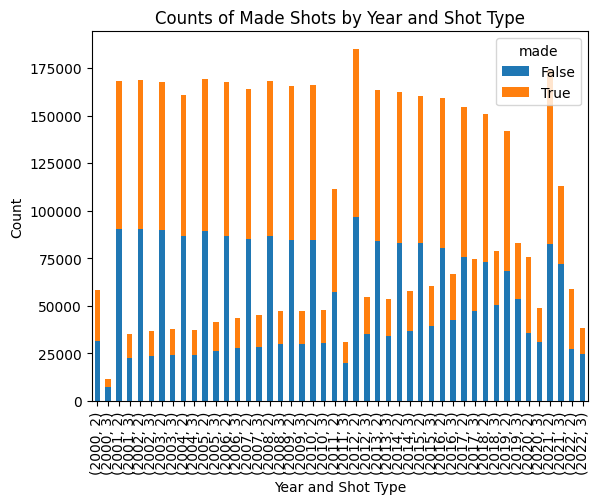

In [ ]:
import matplotlib.pyplot as plt
counts.unstack().plot(kind='bar', stacked=True)
plt.title('Counts of Made Shots by Year and Shot Type')
plt.xlabel('Year and Shot Type')
plt.ylabel('Count')
plt.show()